In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student.csv')

In [3]:
df.shape

(395, 31)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [5]:
df['grade'].value_counts()['A']/df['grade'].value_counts()['F']

0.7681159420289855

In [6]:
df.groupby('sex')['grade'].value_counts()


sex  grade
F    C        94
     B        51
     F        40
     A        23
M    C        76
     B        52
     A        30
     F        29
Name: grade, dtype: int64

In [7]:
FemaleGrade = df.where(df['sex'] == 'F')
FemaleGradeA = FemaleGrade.where(FemaleGrade['grade'] == 'A')
countFemaleGradeA = FemaleGradeA['grade'].count()
FemaleGradeB = FemaleGrade.where(FemaleGrade['grade'] == 'B')
countFemaleGradeB = FemaleGradeB['grade'].count()
countFemaleGradeA+countFemaleGradeB

74

In [8]:
grades = {
    'A': 4.0,
    'B': 3.0,
    'C': 2.0,
    'F' : 1.0
}
df['grade'] = df['grade'].apply(lambda x: grades[x])

In [9]:
df['grade']

0      1.0
1      1.0
2      2.0
3      3.0
4      2.0
      ... 
390    2.0
391    4.0
392    2.0
393    2.0
394    2.0
Name: grade, Length: 395, dtype: float64

In [10]:
df.groupby('sex')['grade'].mean()

sex
F    2.274038
M    2.443850
Name: grade, dtype: float64

In [11]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [12]:
df['sex'] = df['sex'].map( {'F': 1, 'M': 0} ).astype(int)

In [13]:
df['school'].value_counts()

GP    349
MS     46
Name: school, dtype: int64

In [14]:
df['school'] = df['school'].map( {'GP': 1, 'MS': 0} ).astype(int)

In [15]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

In [16]:
df['address'] = df['address'].map( {'U': 1, 'R': 0} ).astype(int)

In [17]:
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [18]:
df['famsize'] = df['famsize'].map( {'GT3': 1, 'LE3': 0} ).astype(int)

In [19]:
df['Pstatus'].value_counts()

T    354
A     41
Name: Pstatus, dtype: int64

In [20]:
df['Pstatus'] = df['Pstatus'].map( {'T': 1, 'A': 0} ).astype(int)

In [21]:
Mjob=pd.get_dummies(df['Mjob'],columns='Mjob',prefix='Mjob')

df[Mjob.columns] = Mjob
df.drop('Mjob',axis = 1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Fjob,reason,...,Dalc,Walc,health,absences,grade,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,1,1,18,1,1,0,4,4,teacher,course,...,1,1,3,6,1.0,1,0,0,0,0
1,1,1,17,1,1,1,1,1,other,course,...,1,1,3,4,1.0,1,0,0,0,0
2,1,1,15,1,0,1,1,1,other,other,...,2,3,3,10,2.0,1,0,0,0,0
3,1,1,15,1,1,1,4,2,services,home,...,1,1,5,2,3.0,0,1,0,0,0
4,1,1,16,1,1,1,3,3,other,home,...,1,2,5,4,2.0,0,0,1,0,0


In [22]:
Fjob=pd.get_dummies(df['Fjob'],columns='Fjob',prefix='Fjob')

df[Fjob.columns] = Fjob
df.drop('Fjob',axis = 1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher
0,1,1,18,1,1,0,4,4,course,mother,...,1,0,0,0,0,0,0,0,0,1
1,1,1,17,1,1,1,1,1,course,father,...,1,0,0,0,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,other,mother,...,1,0,0,0,0,0,0,1,0,0
3,1,1,15,1,1,1,4,2,home,mother,...,0,1,0,0,0,0,0,0,1,0
4,1,1,16,1,1,1,3,3,home,father,...,0,0,1,0,0,0,0,1,0,0


In [23]:
reason=pd.get_dummies(df['reason'],columns='reason',prefix='reason')

df[reason.columns] = reason
df.drop('reason',axis = 1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,guardian,traveltime,...,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation
0,1,1,18,1,1,0,4,4,mother,2,...,0,0,0,0,0,1,1,0,0,0
1,1,1,17,1,1,1,1,1,father,1,...,0,0,0,1,0,0,1,0,0,0
2,1,1,15,1,0,1,1,1,mother,1,...,0,0,0,1,0,0,0,0,1,0
3,1,1,15,1,1,1,4,2,mother,1,...,0,0,0,0,1,0,0,1,0,0
4,1,1,16,1,1,1,3,3,father,1,...,0,0,0,1,0,0,0,1,0,0


In [24]:
guardian=pd.get_dummies(df['guardian'],columns='guardian',prefix='guardian')

df[guardian.columns] = guardian
df.drop('guardian',axis = 1, inplace = True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0


In [25]:
df['schoolsup'].value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [26]:
df['schoolsup'] = df['schoolsup'].map( {'yes': 0, 'no': 1} ).astype(int)

In [27]:
df['famsup'].value_counts()

yes    242
no     153
Name: famsup, dtype: int64

In [28]:
df['famsup'] = df['famsup'].map( {'yes': 1, 'no': 0} ).astype(int)

In [29]:
df['paid'].value_counts()

no     214
yes    181
Name: paid, dtype: int64

In [30]:
df['paid'] = df['paid'].map( {'yes': 0, 'no': 1} ).astype(int)

In [31]:
df['activities'].value_counts()

yes    201
no     194
Name: activities, dtype: int64

In [32]:
df['activities'] = df['activities'].map( {'yes': 1, 'no': 0} ).astype(int)

In [33]:
df['nursery'].value_counts()

yes    314
no      81
Name: nursery, dtype: int64

In [34]:
df['nursery'] = df['nursery'].map( {'yes': 1, 'no': 0} ).astype(int)

In [35]:
df['higher'].value_counts()

yes    375
no      20
Name: higher, dtype: int64

In [36]:
df['higher'] = df['higher'].map( {'yes': 1, 'no': 0} ).astype(int)

In [37]:
df['internet'].value_counts()

yes    329
no      66
Name: internet, dtype: int64

In [38]:
df['internet'] = df['internet'].map( {'yes': 1, 'no': 0} ).astype(int)

In [39]:
df['romantic'].value_counts()

no     263
yes    132
Name: romantic, dtype: int64

In [40]:
df['romantic'] = df['romantic'].map( {'yes': 0, 'no': 1} ).astype(int)

In [41]:
X1 = df.drop('grade', axis =1)
y1 = df['grade']

In [42]:
df.shape

(395, 44)

In [43]:
X1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,...,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,...,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,...,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,...,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,0,20,1,0,0,2,2,1,2,...,0,1,0,1,0,0,0,0,0,1
391,0,0,17,1,0,1,3,1,2,1,...,0,1,0,1,0,0,0,0,1,0
392,0,0,21,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,0,0,1
393,0,0,18,0,0,1,3,2,3,1,...,1,0,0,1,0,0,0,0,1,0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X1_train_org, X1_test_org, y1_train, y1_test = train_test_split(X1,y1, random_state =0 )

In [45]:
X1_test_org

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
329,1,1,17,1,1,1,4,4,2,3,...,0,0,1,1,0,0,0,0,1,0
318,1,1,17,0,1,1,3,4,1,3,...,0,1,0,1,0,0,0,1,0,0
317,1,1,18,1,1,1,4,3,1,3,...,1,0,0,1,0,0,0,0,1,0
65,1,1,16,1,0,1,4,3,3,2,...,0,1,0,1,0,0,0,0,1,0
59,1,1,16,1,1,1,4,2,1,2,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1,0,18,1,1,1,2,2,1,2,...,0,1,0,0,0,0,1,1,0,0
63,1,1,16,1,1,1,4,3,1,3,...,0,0,0,0,1,0,0,0,1,0
245,1,0,16,1,1,1,2,1,3,1,...,1,0,0,1,0,0,0,0,1,0
154,1,1,17,1,1,1,4,4,1,1,...,0,0,1,1,0,0,0,0,1,0


In [46]:

sc = MinMaxScaler()

sc.fit(X1_train_org)

X1_train = sc.transform(X1_train_org)
X1_test = sc.transform(X1_test_org)


In [47]:
X1_test_df = pd.DataFrame(X1_test, columns = X1.columns)
X1_test_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,1.0,0.285714,1.0,1.0,1.0,1.00,1.000000,0.333333,0.666667,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.285714,0.0,1.0,1.0,0.75,1.000000,0.000000,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.428571,1.0,1.0,1.0,1.00,0.666667,0.000000,0.666667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.142857,1.0,0.0,1.0,1.00,0.666667,0.666667,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.142857,1.0,1.0,1.0,1.00,0.333333,0.000000,0.333333,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
y1_test.shape

(99,)

In [49]:
X1_test.shape

(99, 43)

In [50]:
X1_test_df['age'].mean()


0.24675324675324664

In [51]:
#solver= 'lbfgs' 
#multi_class='auto' 
#max_iter=1000 
#random_state = 0
# train dataset. What is the test accuracy of this model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



softmax_reg = LogisticRegression(multi_class="auto",solver="lbfgs", max_iter=1000, random_state= 0)
softmax_reg.fit(X1_train, y1_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
softmax_reg.predict(X1_test)


array([2., 2., 3., 2., 1., 4., 2., 4., 3., 4., 2., 2., 4., 2., 2., 2., 1.,
       3., 3., 3., 2., 1., 2., 3., 2., 4., 2., 2., 3., 3., 1., 1., 2., 1.,
       3., 1., 2., 2., 2., 4., 2., 3., 3., 2., 2., 1., 4., 2., 2., 2., 3.,
       3., 4., 3., 2., 2., 2., 2., 2., 2., 2., 4., 4., 2., 3., 3., 3., 3.,
       2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 2., 2.,
       2., 3., 2., 2., 2., 2., 4., 3., 2., 2., 2., 2., 2., 1.])

In [53]:
softmax_reg.score(X1_test,y1_test)

0.3434343434343434

In [54]:
#Assume letter grades 'A', 'B', and 'C' are passing grades. 
#Turn this dataset to a binomial dataset by considering grades as 'Pass' and 'Fail'. 
#Train a LogisticRegression model on this binomial dataset with the same hyperparameter as the previous question.
#What is the test accuracy of this model? Enter the answer with four significant digits
df.columns.values



array(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'traveltime', 'studytime', 'failures', 'schoolsup',
       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet',
       'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'grade', 'Mjob_at_home', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other'], dtype=object)

In [55]:
grades = {
     4.0 : 1,
     3.0 : 1,
     2.0 : 1,
     1.0 : 0
}
y2 = df['grade'].apply(lambda x: grades[x])

In [56]:
y2

0      0
1      0
2      1
3      1
4      1
      ..
390    1
391    1
392    1
393    1
394    1
Name: grade, Length: 395, dtype: int64

In [57]:
y2.sum()/len(y2)

0.8253164556962025

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X1_train_org, X1_test_org, y2_train, y2_test = train_test_split(X1,y2, random_state =0 )

In [59]:
from sklearn.linear_model import LogisticRegression

train_score_l1 = []

test_score_l1 = []



log_l1 = LogisticRegression(multi_class="auto",solver="lbfgs", max_iter=1000, random_state= 0)

log_l1.fit(X1_train, y2_train)

train_score_l1.append(log_l1.score(X1_train, y2_train))

test_score_l1.append(log_l1.score(X1_test, y2_test))

In [60]:
print(test_score_l1)

[0.8383838383838383]


In [61]:
#Train a support vector machine model with the following hyperparameters setting on the multinomial dataset.



#random_state = 0 
#kernel = 'rbf' 
#gamma = 0.1
#C = 1


#How many instances with grade 'B' in the test dataset are predicted correctly by this model?

%matplotlib inline
from matplotlib import pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
import matplotlib.gridspec as gridspec
import itertools






clf = SVC(kernel='rbf', gamma=0.1, C=1)



clf.fit(X1_train, y1_train)




clf.score(X1_test,y1_test)







0.41414141414141414

In [62]:
 from sklearn.metrics import confusion_matrix

In [63]:
predicted_label = clf.predict(X1_test)


In [64]:
labels = np.unique(y1_test)

In [65]:
cm =confusion_matrix(y1_test, predicted_label,labels=labels)

In [66]:
pd.DataFrame(cm, index=labels, columns=labels)

,1.0,2.0,3.0,4.0
1.0,0,17,0,0
2.0,0,37,5,1
3.0,0,20,4,0
4.0,0,13,2,0


<IPython.core.display.Javascript object>


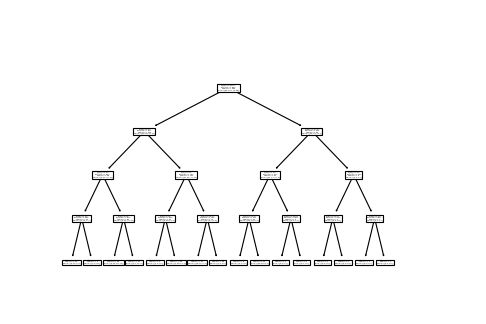

[Text(167.4, 195.696, 'X[10] <= 0.167\nentropy = 1.853\nsamples = 296\nvalue = [52, 127, 79, 38]'),
 Text(83.7, 152.208, 'X[33] <= 0.5\nentropy = 1.847\nsamples = 230\nvalue = [30, 98, 65, 37]'),
 Text(41.85, 108.72, 'X[11] <= 0.5\nentropy = 1.803\nsamples = 98\nvalue = [6, 37, 30, 25]'),
 Text(20.925, 65.232, 'X[35] <= 0.5\nentropy = 1.089\nsamples = 14\nvalue = [1, 11, 1, 1]'),
 Text(10.4625, 21.744, 'entropy = 0.414\nsamples = 12\nvalue = [0, 11, 1, 0]'),
 Text(31.387500000000003, 21.744, 'entropy = 1.0\nsamples = 2\nvalue = [1, 0, 0, 1]'),
 Text(62.775000000000006, 65.232, 'X[9] <= 0.5\nentropy = 1.812\nsamples = 84\nvalue = [5, 26, 29, 24]'),
 Text(52.3125, 21.744, 'entropy = 1.829\nsamples = 63\nvalue = [5, 25, 18, 15]'),
 Text(73.2375, 21.744, 'entropy = 1.222\nsamples = 21\nvalue = [0, 1, 11, 9]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 0.5\nentropy = 1.784\nsamples = 132\nvalue = [24, 61, 35, 12]'),
 Text(104.625, 65.232, 'X[5] <= 0.5\nentropy = 1.655\nsamples = 62\nvalue 

In [67]:
#(Part a) Train a DecisionTreeClassifier model with the following list of hyperparameters.



#max_depth=2 
#random_state=0 
#criterion='entropy'


#What is the entropy of the root node of this decision tree classifier? Enter the number with four significant digits


%matplotlib notebook
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split



dtree = DecisionTreeClassifier(max_depth=4, random_state=0, criterion='entropy')
dtree.fit(X1_train, y1_train)
tree.plot_tree(dtree)
